In [ ]:
!pip install xlsxwriter
import xlsxwriter
import xlrd
import openpyxl
from openpyxl import load_workbook
import os
import os.path
from os import path
import datetime as dt
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import sqlite3 as sql
import pandas as pd
pd.options.mode.chained_assignment = None
from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 149 kB 5.3 MB/s 
Mounted at /content/drive


In [ ]:
display_images = True

In [ ]:
os.chdir("drive/My Drive") # after you run this once you will get an error if you run again. You can ignore

In [ ]:
cnx_2018 = sql.connect('USML_Project/Data/2018_articles.db')
# cnx_2019 = sql.connect('USML_Project/Data/2019_articles.db')
# cnx_2020 = sql.connect('USML_Project/Data/2020_articles.db')

In [ ]:
nbc_2018 = pd.read_sql_query("SELECT * FROM articles WHERE source LIKE '%NBC%'", cnx_2018)
nbc_2018['date']= pd.to_datetime(nbc_2018['date'])

fox_2018 = pd.read_sql_query("SELECT * FROM articles WHERE source LIKE '%Fox News%'", cnx_2018)
fox_2018['date']= pd.to_datetime(fox_2018['date'])

cnn_2018 = pd.read_sql_query("SELECT * FROM articles WHERE source LIKE '%CNN%'", cnx_2018)
cnn_2018['date']= pd.to_datetime(cnn_2018['date'])


In [ ]:
months_2018 = ['February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

cnn_by_month = cnn_2018[['date', 'source']].groupby(pd.Grouper(key='date', 
                                                               freq='1M')).count().rename(columns={'source': 'count'})

fox_by_month = fox_2018[['date', 'source']].groupby(pd.Grouper(key='date', 
                                                               freq='1M')).count().rename(columns={'source': 'count'})

nbc_by_month = nbc_2018[['date', 'source']].groupby(pd.Grouper(key='date', 
                                                               freq='1M')).count().rename(columns={'source': 'count'})   


cnn_by_month['Month'] = months_2018
fox_by_month['Month'] = months_2018
nbc_by_month['Month'] = months_2018

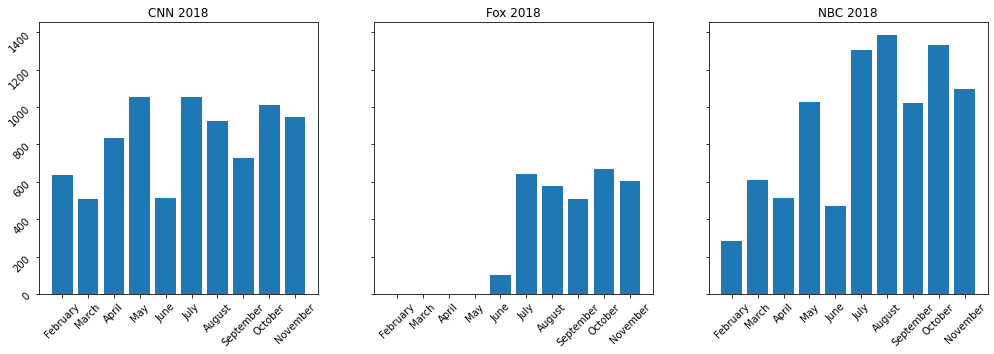

In [ ]:
if display_images:  
  fig, ax = plt.subplots(1,3, figsize=(17,5), sharey=True)

  ax[0].bar(cnn_by_month['Month'], cnn_by_month['count'])
  ax[0].set_title("CNN 2018")
  ax[0].tick_params(labelrotation=45)

  ax[1].bar(fox_by_month['Month'], fox_by_month['count'])
  ax[1].set_title("Fox 2018")
  ax[1].tick_params(labelrotation=45)

  ax[2].bar(nbc_by_month['Month'], nbc_by_month['count'])
  ax[2].set_title("NBC 2018")
  ax[2].tick_params(labelrotation=45)

  plt.show()


In [ ]:
cnn_2018['article_length'] = cnn_2018['content'].str.len().values
cnn_2018['headline_length'] = cnn_2018['name'].str.len().values

fox_2018['article_length'] = fox_2018['content'].str.len().values
fox_2018['headline_length'] = fox_2018['name'].str.len().values

nbc_2018['article_length'] = nbc_2018['content'].str.len().values
nbc_2018['headline_length'] = nbc_2018['name'].str.len().values

In [ ]:
stations = ['CNN', 'Fox News', 'NBC']

avg_headline_length = [cnn_2018['headline_length'].mean(), fox_2018['headline_length'].mean(), nbc_2018['headline_length'].mean()]
avg_article_length = [cnn_2018['article_length'].mean(), fox_2018['article_length'].mean(), nbc_2018['article_length'].mean()]

avg_headline_length =  [round(x) for x in avg_headline_length]
avg_article_length =  [round(x) for x in avg_article_length]

## WordClouds

In [ ]:
import re
#this is only for the content column. propbs should do titles too

dataframes = [cnn_2018, fox_2018, nbc_2018]

for i in dataframes:

  i['content_processed'] = \
  i['content'].map(lambda x: re.sub('[,\.!?]', '', x))

  i['content_processed'] = \
  i['content_processed'].map(lambda x: x.lower())

  # i['content_processed'].head()


In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue', width=400, height=300)
cnn_string = ','.join(list(cnn_2018['content_processed'].values))
wordcloud.generate(cnn_string)
cnn_wordcloud = wordcloud.to_image()

fox_string = ','.join(list(fox_2018['content_processed'].values))
wordcloud.generate(fox_string)
fox_wordcloud = wordcloud.to_image()

nbc_string = ','.join(list(nbc_2018['content_processed'].values))
wordcloud.generate(nbc_string)
nbc_wordcloud = wordcloud.to_image()


Text(0.5, 1.0, 'NBC News')

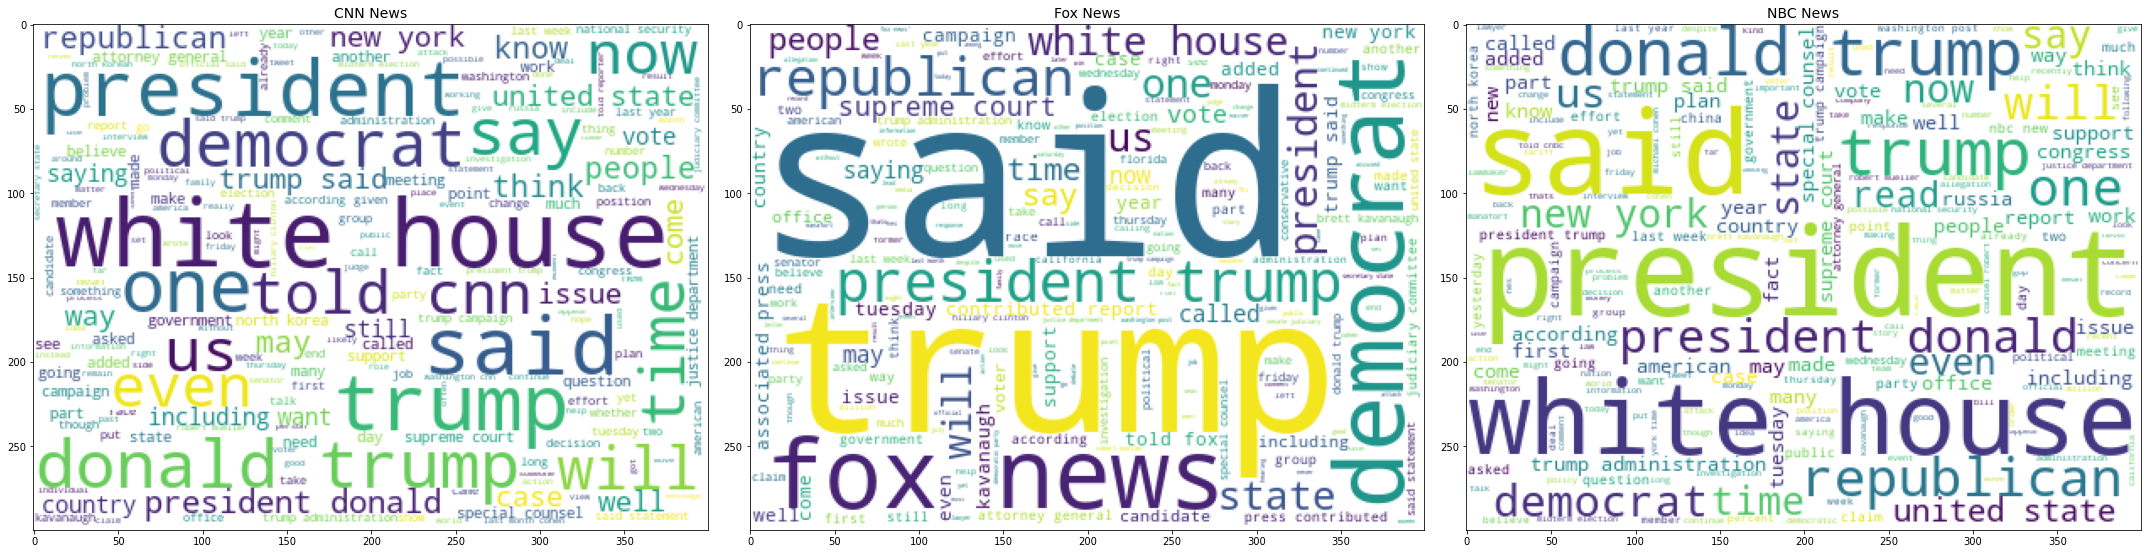

In [ ]:


fig, ax = plt.subplots(1,3, figsize=(30, 30))
fig.tight_layout()

ax[0].imshow(cnn_wordcloud)
ax[0].set_title("CNN News", fontsize = 14)

ax[1].imshow(fox_wordcloud)
ax[1].set_title("Fox News", fontsize = 14)

ax[2].imshow(nbc_wordcloud)
ax[2].set_title("NBC News", fontsize = 14)


In [ ]:
from wordcloud import WordCloud
samp = df.sample(n=5000, random_state=1)#running without sample was so big it crashed colab
long_string = ','.join(list(samp['content_processed'].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

[3894, 4067, 1024]

In [ ]:
# Ved edits - Stop words and punctuation function
Cstopwords=set(stopwords.words('english')+list(punctuation))
lemma=WordNetLemmatizer()
def clean_dialogue(dialogue_column):
    dialogue_corpus=[]
#     count_of_words = 0
    for i in range(0,len(dialogue_column)):
        dialogue=dialogue_column[i]
        dialogue=str(dialogue).lower()
        dialogue=word_tokenize(dialogue)
        dialogue = [word.lower() for word in dialogue if word.isalpha() and word not in Cstopwords]
        dialogue=[lemma.lemmatize(w) for w in dialogue ]
#         dialogue=' '.join(dialogue)
#         count_of_words+=len(dialogue)
        dialogue_corpus.append(dialogue)
#     print('count_of_words:', count_of_words)
    return dialogue_corpus